<a href="https://colab.research.google.com/github/JoYongJIn/YongJin-Repository/blob/main/Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv",sep = ",")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


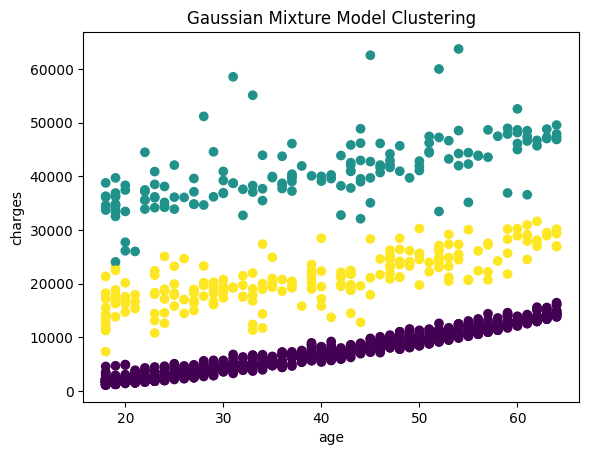

In [31]:
from sklearn.mixture import GaussianMixture

# 두 가지 feature 선택
X = df[['age', 'charges']]

# 가우시안 혼합 모델 생성
gmm = GaussianMixture(n_components=3, covariance_type='full')

# 데이터에 모델 피팅
gmm.fit(X)

# 군집 예측
labels = gmm.predict(X)

# 군집 결과 시각화
plt.scatter(X['age'], X['charges'], c=labels, cmap='viridis')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Gaussian Mixture Model Clustering')
plt.show()


In [34]:
# 가우시안 혼합 모델에서 샘플 생성
num_samples = 5  # 생성할 샘플 개수

# 각 가우시안 분포에서 샘플 생성
samples = []
for component in range(gmm.n_components):
    component_samples = gmm.sample(num_samples)[0]
    samples.append(component_samples)

# 생성된 샘플 출력
for i, component_samples in enumerate(samples):
    print(f"Component {i+1} samples:")
    print(component_samples)


Component 1 samples:
[[   29.3652331   3831.58940692]
 [   51.69551838 11486.12525842]
 [   31.20048515  3758.23133022]
 [   50.28312314 10311.25360088]
 [   38.46341024 27752.3155235 ]]
Component 2 samples:
[[   56.88520977 12478.10614222]
 [   70.71611878 14436.84153585]
 [   31.051919    3866.26667301]
 [   63.7463335  13277.40590153]
 [   54.68740496 10687.27638982]]
Component 3 samples:
[[   42.06621138  8442.45136586]
 [   18.66459714  1903.5675391 ]
 [   14.41522895  -195.69710651]
 [   56.49495058 11838.74100303]
 [   46.75376542  7408.95377264]]


In [35]:
from scipy.spatial.distance import cdist
from scipy.stats import chi2

# 가우시안 혼합 모델에서 각 샘플에 대한 Mahalanobis 거리 계산
distances = []
for i in range(gmm.n_components):
    # 각 샘플과 해당 가우시안 분포의 평균 사이의 Mahalanobis 거리 계산
    component_distances = cdist(samples[i], gmm.means_[i].reshape(1, -1), 'mahalanobis', VI=np.linalg.pinv(gmm.covariances_[i]))
    distances.append(component_distances)

# 전체 샘플의 Mahalanobis 거리 합산
distances = np.concatenate(distances)

# chi-square 분포의 98번째 백분위수에 해당하는 거리를 찾아 이상치 임계값 설정
threshold = chi2.ppf((1-0.02), df=2)

# 이상치 탐지
outliers = distances > threshold

# 이상치 출력
print(f"Outlier indices:")
print(np.where(outliers)[0])

Outlier indices:
[4]
